In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2, os

In [ ]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [ ]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass (1).csv


In [ ]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,0
1,2,DSCF0900.JPG,800,specialty,0
2,3,DSCF0904.JPG,1250,specialty,0
3,4,DSCF0905.JPG,400,specialty,0
4,5,DSCF0910.JPG,800,specialty,0
...,...,...,...,...,...
895,896,DSCF2197.JPG,800,off,4
896,897,DSCF2198.JPG,1250,off,4
897,898,DSCF2200.JPG,400,off,4
898,899,DSCF2201.JPG,800,off,4


In [ ]:
width = 265#1920#530#265
height = 265#149#1024#298#149

In [ ]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
arrayImages = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  #img = np.array(img)
  image_list.append(img)
  img = np.array(img)
  arrayImages.append(img)

label = dtLabel['label']

  0%|          | 0/900 [00:00<?, ?it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCEE438>


  0%|          | 1/900 [00:00<05:27,  2.74it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCEF438>


  0%|          | 2/900 [00:00<05:06,  2.93it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCEF438>


  0%|          | 3/900 [00:00<04:51,  3.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC4AFD0>


  0%|          | 4/900 [00:01<04:39,  3.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC57860>


  1%|          | 5/900 [00:01<04:29,  3.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC4AFD0>


  1%|          | 6/900 [00:01<04:28,  3.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC4AFD0>


  1%|          | 7/900 [00:02<04:19,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC57860>


  1%|          | 8/900 [00:02<04:15,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC57860>


  1%|          | 9/900 [00:02<04:20,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECD0A2E8>


  1%|          | 10/900 [00:02<04:21,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECD0D198>


  1%|          | 11/900 [00:03<04:19,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECD16470>


  1%|▏         | 12/900 [00:03<04:19,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECD1A908>


  1%|▏         | 13/900 [00:03<04:19,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECD1C6D8>


  2%|▏         | 14/900 [00:04<04:18,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC20A90>


  2%|▏         | 15/900 [00:04<04:18,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC27860>


  2%|▏         | 16/900 [00:04<04:16,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC2C8D0>


  2%|▏         | 17/900 [00:04<04:13,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC27518>


  2%|▏         | 18/900 [00:05<04:14,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC32358>


  2%|▏         | 19/900 [00:05<04:11,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC288D0>


  2%|▏         | 20/900 [00:05<04:12,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC27518>


  2%|▏         | 21/900 [00:06<04:15,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC31B70>


  2%|▏         | 22/900 [00:06<04:14,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC2F7F0>


  3%|▎         | 23/900 [00:06<04:14,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35EF0>


  3%|▎         | 24/900 [00:07<04:15,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC354E0>


  3%|▎         | 25/900 [00:07<04:12,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC2F828>


  3%|▎         | 26/900 [00:07<04:11,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC2FF60>


  3%|▎         | 27/900 [00:07<04:15,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC2F978>


  3%|▎         | 28/900 [00:08<04:15,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC2FEF0>


  3%|▎         | 29/900 [00:08<04:11,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC2F390>


  3%|▎         | 30/900 [00:08<04:14,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC2F4A8>


  3%|▎         | 31/900 [00:09<04:09,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC2F828>


  4%|▎         | 32/900 [00:09<04:07,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC2F828>


  4%|▎         | 33/900 [00:09<04:08,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC356A0>


  4%|▍         | 34/900 [00:09<04:07,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35940>


  4%|▍         | 35/900 [00:10<04:07,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35828>


  4%|▍         | 36/900 [00:10<04:08,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35C50>


  4%|▍         | 37/900 [00:10<04:04,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC357B8>


  4%|▍         | 38/900 [00:11<04:06,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35438>


  4%|▍         | 39/900 [00:11<04:06,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35C50>


  4%|▍         | 40/900 [00:11<04:01,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35DD8>


  5%|▍         | 41/900 [00:11<04:00,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35438>


  5%|▍         | 42/900 [00:12<04:01,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35630>


  5%|▍         | 43/900 [00:12<03:59,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC351D0>


  5%|▍         | 44/900 [00:12<03:59,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35320>


  5%|▌         | 45/900 [00:12<04:03,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35A90>


  5%|▌         | 46/900 [00:13<04:00,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC351D0>


  5%|▌         | 47/900 [00:13<04:00,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35320>


  5%|▌         | 48/900 [00:13<04:05,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35320>


  5%|▌         | 49/900 [00:14<04:01,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC35DD8>


  6%|▌         | 50/900 [00:14<04:02,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38DA0>


  6%|▌         | 51/900 [00:14<04:05,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38D30>


  6%|▌         | 52/900 [00:14<04:03,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38940>


  6%|▌         | 53/900 [00:15<04:01,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38780>


  6%|▌         | 54/900 [00:15<04:05,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC388D0>


  6%|▌         | 55/900 [00:15<04:01,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38828>


  6%|▌         | 56/900 [00:16<04:00,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38DD8>


  6%|▋         | 57/900 [00:16<04:00,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38FD0>


  6%|▋         | 58/900 [00:16<03:55,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38B38>


  7%|▋         | 59/900 [00:16<03:57,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38630>


  7%|▋         | 60/900 [00:17<03:57,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38668>


  7%|▋         | 61/900 [00:17<03:53,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38F98>


  7%|▋         | 62/900 [00:17<03:51,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38898>


  7%|▋         | 63/900 [00:18<03:55,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC383C8>


  7%|▋         | 64/900 [00:18<03:53,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC387B8>


  7%|▋         | 65/900 [00:18<03:58,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC386D8>


  7%|▋         | 66/900 [00:18<03:57,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC389B0>


  7%|▋         | 67/900 [00:19<03:53,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38438>


  8%|▊         | 68/900 [00:19<03:54,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38EF0>


  8%|▊         | 69/900 [00:19<03:57,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38F60>


  8%|▊         | 70/900 [00:20<03:56,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38710>


  8%|▊         | 71/900 [00:20<03:55,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38C18>


  8%|▊         | 72/900 [00:20<03:54,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC386A0>


  8%|▊         | 73/900 [00:20<03:51,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38C50>


  8%|▊         | 74/900 [00:21<03:50,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38E10>


  8%|▊         | 75/900 [00:21<03:55,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC385C0>


  8%|▊         | 76/900 [00:21<03:51,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC387F0>


  9%|▊         | 77/900 [00:22<03:53,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38400>


  9%|▊         | 78/900 [00:22<03:57,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38278>


  9%|▉         | 79/900 [00:22<03:55,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38C50>


  9%|▉         | 80/900 [00:22<03:59,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38240>


  9%|▉         | 81/900 [00:23<04:01,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38278>


  9%|▉         | 82/900 [00:23<03:55,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC387F0>


  9%|▉         | 83/900 [00:23<03:53,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38240>


  9%|▉         | 84/900 [00:24<03:59,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC38908>


  9%|▉         | 85/900 [00:24<03:54,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3ABE0>


 10%|▉         | 86/900 [00:24<03:53,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A160>


 10%|▉         | 87/900 [00:24<03:54,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A6D8>


 10%|▉         | 88/900 [00:25<03:51,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A160>


 10%|▉         | 89/900 [00:25<03:49,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A198>


 10%|█         | 90/900 [00:25<03:55,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A978>


 10%|█         | 91/900 [00:26<03:51,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A240>


 10%|█         | 92/900 [00:26<03:50,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3AA58>


 10%|█         | 93/900 [00:26<03:54,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A630>


 10%|█         | 94/900 [00:26<03:49,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A748>


 11%|█         | 95/900 [00:27<03:49,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3ACF8>


 11%|█         | 96/900 [00:27<03:50,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A1D0>


 11%|█         | 97/900 [00:27<03:46,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3ACC0>


 11%|█         | 98/900 [00:28<03:46,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A630>


 11%|█         | 99/900 [00:28<03:50,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A6A0>


 11%|█         | 100/900 [00:28<03:46,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3AB70>


 11%|█         | 101/900 [00:28<03:49,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3AEB8>


 11%|█▏        | 102/900 [00:29<03:51,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3AA90>


 11%|█▏        | 103/900 [00:29<03:44,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A588>


 12%|█▏        | 104/900 [00:29<03:45,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A208>


 12%|█▏        | 105/900 [00:30<03:48,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A668>


 12%|█▏        | 106/900 [00:30<03:46,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A9B0>


 12%|█▏        | 107/900 [00:30<03:44,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A470>


 12%|█▏        | 108/900 [00:30<03:47,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A7B8>


 12%|█▏        | 109/900 [00:31<03:45,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3AC18>


 12%|█▏        | 110/900 [00:31<03:46,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A8D0>


 12%|█▏        | 111/900 [00:31<03:49,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A278>


 12%|█▏        | 112/900 [00:32<03:43,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A5C0>


 13%|█▎        | 113/900 [00:32<03:45,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3AC50>


 13%|█▎        | 114/900 [00:32<03:48,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A400>


 13%|█▎        | 115/900 [00:32<03:45,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3AC18>


 13%|█▎        | 116/900 [00:33<03:45,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A278>


 13%|█▎        | 117/900 [00:33<03:45,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3AF98>


 13%|█▎        | 118/900 [00:33<03:41,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3AC18>


 13%|█▎        | 119/900 [00:34<03:41,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3A278>


 13%|█▎        | 120/900 [00:34<03:43,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3AC50>


 13%|█▎        | 121/900 [00:34<03:39,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B6A0>


 14%|█▎        | 122/900 [00:34<03:40,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B668>


 14%|█▎        | 123/900 [00:35<03:43,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BC88>


 14%|█▍        | 124/900 [00:35<03:39,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BD30>


 14%|█▍        | 125/900 [00:35<03:40,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B5F8>


 14%|█▍        | 126/900 [00:36<03:43,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BE48>


 14%|█▍        | 127/900 [00:36<03:40,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B160>


 14%|█▍        | 128/900 [00:36<03:40,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BD68>


 14%|█▍        | 129/900 [00:36<03:41,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B400>


 14%|█▍        | 130/900 [00:37<03:38,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B240>


 15%|█▍        | 131/900 [00:37<03:38,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B080>


 15%|█▍        | 132/900 [00:37<03:38,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B400>


 15%|█▍        | 133/900 [00:38<03:36,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B128>


 15%|█▍        | 134/900 [00:38<03:37,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B630>


 15%|█▌        | 135/900 [00:38<03:38,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B160>


 15%|█▌        | 136/900 [00:38<03:35,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BDD8>


 15%|█▌        | 137/900 [00:39<03:34,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BCC0>


 15%|█▌        | 138/900 [00:39<03:39,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BB38>


 15%|█▌        | 139/900 [00:39<03:41,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BF28>


 16%|█▌        | 140/900 [00:40<03:39,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B780>


 16%|█▌        | 141/900 [00:40<03:41,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B9E8>


 16%|█▌        | 142/900 [00:40<03:36,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BC18>


 16%|█▌        | 143/900 [00:40<03:34,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BA90>


 16%|█▌        | 144/900 [00:41<03:34,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BC50>


 16%|█▌        | 145/900 [00:41<03:34,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BE10>


 16%|█▌        | 146/900 [00:41<03:32,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BB00>


 16%|█▋        | 147/900 [00:42<03:34,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BF60>


 16%|█▋        | 148/900 [00:42<03:33,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B908>


 17%|█▋        | 149/900 [00:42<03:31,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B860>


 17%|█▋        | 150/900 [00:42<03:34,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BE10>


 17%|█▋        | 151/900 [00:43<03:30,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BB00>


 17%|█▋        | 152/900 [00:43<03:31,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BF60>


 17%|█▋        | 153/900 [00:43<03:33,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3B748>


 17%|█▋        | 154/900 [00:44<03:32,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BB00>


 17%|█▋        | 155/900 [00:44<03:31,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BB00>


 17%|█▋        | 156/900 [00:44<03:33,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3BB00>


 17%|█▋        | 157/900 [00:44<03:29,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F4A8>


 18%|█▊        | 158/900 [00:45<03:30,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FDA0>


 18%|█▊        | 159/900 [00:45<03:31,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F4A8>


 18%|█▊        | 160/900 [00:45<03:28,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F7B8>


 18%|█▊        | 161/900 [00:46<03:27,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F0B8>


 18%|█▊        | 162/900 [00:46<03:32,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FB00>


 18%|█▊        | 163/900 [00:46<03:31,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FB70>


 18%|█▊        | 164/900 [00:46<03:28,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F1D0>


 18%|█▊        | 165/900 [00:47<03:28,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FC18>


 18%|█▊        | 166/900 [00:47<03:28,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F898>


 19%|█▊        | 167/900 [00:47<03:27,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F8D0>


 19%|█▊        | 168/900 [00:48<03:28,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FA58>


 19%|█▉        | 169/900 [00:48<03:24,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FCF8>


 19%|█▉        | 170/900 [00:48<03:24,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F630>


 19%|█▉        | 171/900 [00:48<03:24,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F860>


 19%|█▉        | 172/900 [00:49<03:22,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FF28>


 19%|█▉        | 173/900 [00:49<03:21,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FA58>


 19%|█▉        | 174/900 [00:49<03:25,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F588>


 19%|█▉        | 175/900 [00:49<03:21,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F9E8>


 20%|█▉        | 176/900 [00:50<03:23,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FE10>


 20%|█▉        | 177/900 [00:50<03:28,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F908>


 20%|█▉        | 178/900 [00:50<03:27,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F470>


 20%|█▉        | 179/900 [00:51<03:24,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F6A0>


 20%|██        | 180/900 [00:51<03:26,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FE48>


 20%|██        | 181/900 [00:51<03:23,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F4A8>


 20%|██        | 182/900 [00:51<03:21,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FF60>


 20%|██        | 183/900 [00:52<03:21,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FFD0>


 20%|██        | 184/900 [00:52<03:21,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F6A0>


 21%|██        | 185/900 [00:52<03:19,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F208>


 21%|██        | 186/900 [00:53<03:20,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FEF0>


 21%|██        | 187/900 [00:53<03:18,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F080>


 21%|██        | 188/900 [00:53<03:20,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F828>


 21%|██        | 189/900 [00:53<03:20,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3FEF0>


 21%|██        | 190/900 [00:54<03:17,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F6A0>


 21%|██        | 191/900 [00:54<03:16,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F828>


 21%|██▏       | 192/900 [00:54<03:20,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F828>


 21%|██▏       | 193/900 [00:55<03:17,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC3F240>


 22%|██▏       | 194/900 [00:55<03:16,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8630>


 22%|██▏       | 195/900 [00:55<03:18,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8DA0>


 22%|██▏       | 196/900 [00:55<03:16,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A87F0>


 22%|██▏       | 197/900 [00:56<03:14,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8CC0>


 22%|██▏       | 198/900 [00:56<03:16,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8400>


 22%|██▏       | 199/900 [00:56<03:15,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8E80>


 22%|██▏       | 200/900 [00:57<03:13,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8048>


 22%|██▏       | 201/900 [00:57<03:16,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A82E8>


 22%|██▏       | 202/900 [00:57<03:14,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8978>


 23%|██▎       | 203/900 [00:57<03:14,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8908>


 23%|██▎       | 204/900 [00:58<03:14,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8E48>


 23%|██▎       | 205/900 [00:58<03:14,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A87B8>


 23%|██▎       | 206/900 [00:58<03:14,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8550>


 23%|██▎       | 207/900 [00:58<03:14,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8710>


 23%|██▎       | 208/900 [00:59<03:12,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8F28>


 23%|██▎       | 209/900 [00:59<03:10,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8550>


 23%|██▎       | 210/900 [00:59<03:15,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8A58>


 23%|██▎       | 211/900 [01:00<03:11,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8C18>


 24%|██▎       | 212/900 [01:00<03:10,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A89B0>


 24%|██▎       | 213/900 [01:00<03:11,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8198>


 24%|██▍       | 214/900 [01:00<03:13,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A81D0>


 24%|██▍       | 215/900 [01:01<03:18,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8EB8>


 24%|██▍       | 216/900 [01:01<03:17,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8A90>


 24%|██▍       | 217/900 [01:01<03:15,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8BE0>


 24%|██▍       | 218/900 [01:02<03:14,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A86D8>


 24%|██▍       | 219/900 [01:02<03:15,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A84E0>


 24%|██▍       | 220/900 [01:02<03:13,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8E10>


 25%|██▍       | 221/900 [01:02<03:17,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8240>


 25%|██▍       | 222/900 [01:03<03:18,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8BE0>


 25%|██▍       | 223/900 [01:03<03:15,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A86D8>


 25%|██▍       | 224/900 [01:03<03:15,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A84E0>


 25%|██▌       | 225/900 [01:04<03:15,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8E10>


 25%|██▌       | 226/900 [01:04<03:12,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A8A90>


 25%|██▌       | 227/900 [01:04<03:10,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A84E0>


 25%|██▌       | 228/900 [01:04<03:14,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4A84E0>


 25%|██▌       | 229/900 [01:05<03:11,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7940>


 26%|██▌       | 230/900 [01:05<03:10,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7DA0>


 26%|██▌       | 231/900 [01:05<03:13,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7588>


 26%|██▌       | 232/900 [01:06<03:10,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7748>


 26%|██▌       | 233/900 [01:06<03:10,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7278>


 26%|██▌       | 234/900 [01:06<03:12,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C70F0>


 26%|██▌       | 235/900 [01:06<03:10,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7C18>


 26%|██▌       | 236/900 [01:07<03:10,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7CC0>


 26%|██▋       | 237/900 [01:07<03:11,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7A58>


 26%|██▋       | 238/900 [01:07<03:10,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7278>


 27%|██▋       | 239/900 [01:08<03:10,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7908>


 27%|██▋       | 240/900 [01:08<03:11,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7048>


 27%|██▋       | 241/900 [01:08<03:08,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7F28>


 27%|██▋       | 242/900 [01:09<03:09,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C79E8>


 27%|██▋       | 243/900 [01:09<03:11,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7860>


 27%|██▋       | 244/900 [01:09<03:10,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7E80>


 27%|██▋       | 245/900 [01:09<03:08,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7D68>


 27%|██▋       | 246/900 [01:10<03:10,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C74E0>


 27%|██▋       | 247/900 [01:10<03:07,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7978>


 28%|██▊       | 248/900 [01:10<03:06,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7C88>


 28%|██▊       | 249/900 [01:11<03:08,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7128>


 28%|██▊       | 250/900 [01:11<03:05,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7E10>


 28%|██▊       | 251/900 [01:11<03:11,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7470>


 28%|██▊       | 252/900 [01:11<03:10,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7978>


 28%|██▊       | 253/900 [01:12<03:08,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7B70>


 28%|██▊       | 254/900 [01:12<03:06,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7240>


 28%|██▊       | 255/900 [01:12<03:08,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C70B8>


 28%|██▊       | 256/900 [01:13<03:09,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7B00>


 29%|██▊       | 257/900 [01:13<03:07,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C75F8>


 29%|██▊       | 258/900 [01:13<03:08,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C77B8>


 29%|██▉       | 259/900 [01:13<03:06,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7B70>


 29%|██▉       | 260/900 [01:14<03:05,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7320>


 29%|██▉       | 261/900 [01:14<03:06,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C77B8>


 29%|██▉       | 262/900 [01:14<03:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7B70>


 29%|██▉       | 263/900 [01:15<03:08,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7320>


 29%|██▉       | 264/900 [01:15<03:08,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4C7320>


 29%|██▉       | 265/900 [01:15<03:05,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDD30>


 30%|██▉       | 266/900 [01:15<03:04,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDB70>


 30%|██▉       | 267/900 [01:16<03:05,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDE80>


 30%|██▉       | 268/900 [01:16<03:02,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD208>


 30%|██▉       | 269/900 [01:16<03:01,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDDA0>


 30%|███       | 270/900 [01:17<03:03,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD588>


 30%|███       | 271/900 [01:17<03:05,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD3C8>


 30%|███       | 272/900 [01:17<03:02,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD860>


 30%|███       | 273/900 [01:18<03:03,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDC88>


 30%|███       | 274/900 [01:18<03:02,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD828>


 31%|███       | 275/900 [01:18<02:59,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD128>


 31%|███       | 276/900 [01:18<02:59,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD240>


 31%|███       | 277/900 [01:19<02:59,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDAC8>


 31%|███       | 278/900 [01:19<02:58,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDEF0>


 31%|███       | 279/900 [01:19<02:57,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD710>


 31%|███       | 280/900 [01:20<02:54,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDC18>


 31%|███       | 281/900 [01:20<02:56,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD358>


 31%|███▏      | 282/900 [01:20<02:56,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDA20>


 31%|███▏      | 283/900 [01:20<02:54,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD7B8>


 32%|███▏      | 284/900 [01:21<02:56,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD240>


 32%|███▏      | 285/900 [01:21<02:58,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD898>


 32%|███▏      | 286/900 [01:21<02:54,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD128>


 32%|███▏      | 287/900 [01:22<02:57,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD470>


 32%|███▏      | 288/900 [01:22<02:58,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD160>


 32%|███▏      | 289/900 [01:22<02:54,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDB38>


 32%|███▏      | 290/900 [01:22<02:52,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDB00>


 32%|███▏      | 291/900 [01:23<02:56,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDBE0>


 32%|███▏      | 292/900 [01:23<02:51,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDF28>


 33%|███▎      | 293/900 [01:23<02:50,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD630>


 33%|███▎      | 294/900 [01:24<02:53,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD4A8>


 33%|███▎      | 295/900 [01:24<02:51,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDB38>


 33%|███▎      | 296/900 [01:24<02:52,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDBE0>


 33%|███▎      | 297/900 [01:24<02:53,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD780>


 33%|███▎      | 298/900 [01:25<02:51,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CD908>


 33%|███▎      | 299/900 [01:25<02:52,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDBE0>


 33%|███▎      | 300/900 [01:25<02:51,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDF4CDBE0>


 33%|███▎      | 301/900 [01:26<02:49,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAD30>


 34%|███▎      | 302/900 [01:26<02:50,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA390>


 34%|███▎      | 303/900 [01:26<02:50,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA630>


 34%|███▍      | 304/900 [01:26<02:47,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAACC0>


 34%|███▍      | 305/900 [01:27<02:49,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA048>


 34%|███▍      | 306/900 [01:27<02:52,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAE80>


 34%|███▍      | 307/900 [01:27<02:49,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA8D0>


 34%|███▍      | 308/900 [01:28<02:49,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA630>


 34%|███▍      | 309/900 [01:28<02:51,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA208>


 34%|███▍      | 310/900 [01:28<02:49,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA1D0>


 35%|███▍      | 311/900 [01:28<02:47,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAE10>


 35%|███▍      | 312/900 [01:29<02:48,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA240>


 35%|███▍      | 313/900 [01:29<02:46,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA6D8>


 35%|███▍      | 314/900 [01:29<02:46,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAE48>


 35%|███▌      | 315/900 [01:30<02:47,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA978>


 35%|███▌      | 316/900 [01:30<02:45,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAE10>


 35%|███▌      | 317/900 [01:30<02:46,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA4E0>


 35%|███▌      | 318/900 [01:30<02:46,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA5C0>


 35%|███▌      | 319/900 [01:31<02:44,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAA20>


 36%|███▌      | 320/900 [01:31<02:45,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA9B0>


 36%|███▌      | 321/900 [01:31<02:46,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA358>


 36%|███▌      | 322/900 [01:32<02:48,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA898>


 36%|███▌      | 323/900 [01:32<02:47,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAC88>


 36%|███▌      | 324/900 [01:32<02:53,  3.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA358>


 36%|███▌      | 325/900 [01:32<02:48,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA278>


 36%|███▌      | 326/900 [01:33<02:44,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAACF8>


 36%|███▋      | 327/900 [01:33<02:45,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAB38>


 36%|███▋      | 328/900 [01:33<02:43,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAAC8>


 37%|███▋      | 329/900 [01:34<02:42,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA358>


 37%|███▋      | 330/900 [01:34<02:44,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAA20>


 37%|███▋      | 331/900 [01:34<02:45,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA6A0>


 37%|███▋      | 332/900 [01:34<02:42,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAB38>


 37%|███▋      | 333/900 [01:35<02:42,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA400>


 37%|███▋      | 334/900 [01:35<02:41,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAABE0>


 37%|███▋      | 335/900 [01:35<02:39,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAAB38>


 37%|███▋      | 336/900 [01:36<02:39,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCAA278>


 37%|███▋      | 337/900 [01:36<02:39,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5860>


 38%|███▊      | 338/900 [01:36<02:41,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5240>


 38%|███▊      | 339/900 [01:36<02:42,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB55C0>


 38%|███▊      | 340/900 [01:37<02:38,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5208>


 38%|███▊      | 341/900 [01:37<02:41,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5240>


 38%|███▊      | 342/900 [01:37<02:41,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5390>


 38%|███▊      | 343/900 [01:38<02:38,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB52E8>


 38%|███▊      | 344/900 [01:38<02:38,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB51D0>


 38%|███▊      | 345/900 [01:38<02:41,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5E80>


 38%|███▊      | 346/900 [01:38<02:38,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5EF0>


 39%|███▊      | 347/900 [01:39<02:37,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB57F0>


 39%|███▊      | 348/900 [01:39<02:39,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5EB8>


 39%|███▉      | 349/900 [01:39<02:35,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5F60>


 39%|███▉      | 350/900 [01:40<02:35,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5080>


 39%|███▉      | 351/900 [01:40<02:37,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB50B8>


 39%|███▉      | 352/900 [01:40<02:35,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5048>


 39%|███▉      | 353/900 [01:40<02:36,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5780>


 39%|███▉      | 354/900 [01:41<02:37,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5518>


 39%|███▉      | 355/900 [01:41<02:33,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5668>


 40%|███▉      | 356/900 [01:41<02:35,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5198>


 40%|███▉      | 357/900 [01:42<02:35,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5C18>


 40%|███▉      | 358/900 [01:42<02:32,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5E10>


 40%|███▉      | 359/900 [01:42<02:33,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5B70>


 40%|████      | 360/900 [01:42<02:35,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5358>


 40%|████      | 361/900 [01:43<02:36,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB53C8>


 40%|████      | 362/900 [01:43<02:35,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5898>


 40%|████      | 363/900 [01:43<02:36,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5DD8>


 40%|████      | 364/900 [01:44<02:34,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5D30>


 41%|████      | 365/900 [01:44<02:33,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB52B0>


 41%|████      | 366/900 [01:44<02:35,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB53C8>


 41%|████      | 367/900 [01:44<02:32,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5898>


 41%|████      | 368/900 [01:45<02:31,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5DD8>


 41%|████      | 369/900 [01:45<02:33,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5D30>


 41%|████      | 370/900 [01:45<02:33,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5160>


 41%|████      | 371/900 [01:46<02:31,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5DD8>


 41%|████▏     | 372/900 [01:46<02:32,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCB5550>


 41%|████▏     | 373/900 [01:46<02:32,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF390>


 42%|████▏     | 374/900 [01:46<02:30,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFA58>


 42%|████▏     | 375/900 [01:47<02:31,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFB70>


 42%|████▏     | 376/900 [01:47<02:29,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF320>


 42%|████▏     | 377/900 [01:47<02:30,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF7F0>


 42%|████▏     | 378/900 [01:48<02:31,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFB70>


 42%|████▏     | 379/900 [01:48<02:29,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF198>


 42%|████▏     | 380/900 [01:48<02:29,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFBE0>


 42%|████▏     | 381/900 [01:48<02:29,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFAC8>


 42%|████▏     | 382/900 [01:49<02:28,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF6A0>


 43%|████▎     | 383/900 [01:49<02:28,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF2B0>


 43%|████▎     | 384/900 [01:49<02:30,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFFD0>


 43%|████▎     | 385/900 [01:50<02:28,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFC88>


 43%|████▎     | 386/900 [01:50<02:26,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF438>


 43%|████▎     | 387/900 [01:50<02:30,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF710>


 43%|████▎     | 388/900 [01:50<02:26,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF160>


 43%|████▎     | 389/900 [01:51<02:26,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF978>


 43%|████▎     | 390/900 [01:51<02:28,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF320>


 43%|████▎     | 391/900 [01:51<02:26,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFE10>


 44%|████▎     | 392/900 [01:52<02:24,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFE48>


 44%|████▎     | 393/900 [01:52<02:27,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF5C0>


 44%|████▍     | 394/900 [01:52<02:26,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF978>


 44%|████▍     | 395/900 [01:53<02:25,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF908>


 44%|████▍     | 396/900 [01:53<02:28,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF358>


 44%|████▍     | 397/900 [01:53<02:27,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF978>


 44%|████▍     | 398/900 [01:53<02:27,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF240>


 44%|████▍     | 399/900 [01:54<02:27,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF0B8>


 44%|████▍     | 400/900 [01:54<02:25,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFCC0>


 45%|████▍     | 401/900 [01:54<02:23,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFA20>


 45%|████▍     | 402/900 [01:55<02:24,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF978>


 45%|████▍     | 403/900 [01:55<02:23,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF940>


 45%|████▍     | 404/900 [01:55<02:22,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF0B8>


 45%|████▌     | 405/900 [01:55<02:24,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF978>


 45%|████▌     | 406/900 [01:56<02:22,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBF0B8>


 45%|████▌     | 407/900 [01:56<02:21,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFCC0>


 45%|████▌     | 408/900 [01:56<02:22,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFEF0>


 45%|████▌     | 409/900 [01:57<02:21,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCBFB38>


 46%|████▌     | 410/900 [01:57<02:21,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9470>


 46%|████▌     | 411/900 [01:57<02:22,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9940>


 46%|████▌     | 412/900 [01:57<02:21,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD96D8>


 46%|████▌     | 413/900 [01:58<02:21,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD93C8>


 46%|████▌     | 414/900 [01:58<02:22,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9668>


 46%|████▌     | 415/900 [01:58<02:21,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9D68>


 46%|████▌     | 416/900 [01:59<02:20,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9128>


 46%|████▋     | 417/900 [01:59<02:21,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9BE0>


 46%|████▋     | 418/900 [01:59<02:18,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9C18>


 47%|████▋     | 419/900 [01:59<02:19,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9C88>


 47%|████▋     | 420/900 [02:00<02:19,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9FD0>


 47%|████▋     | 421/900 [02:00<02:18,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD91D0>


 47%|████▋     | 422/900 [02:00<02:18,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9F60>


 47%|████▋     | 423/900 [02:01<02:19,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD95F8>


 47%|████▋     | 424/900 [02:01<02:16,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9400>


 47%|████▋     | 425/900 [02:01<02:16,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9E80>


 47%|████▋     | 426/900 [02:02<02:18,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9B70>


 47%|████▋     | 427/900 [02:02<02:17,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD99E8>


 48%|████▊     | 428/900 [02:02<02:16,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9C50>


 48%|████▊     | 429/900 [02:02<02:16,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9978>


 48%|████▊     | 430/900 [02:03<02:13,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9AC8>


 48%|████▊     | 431/900 [02:03<02:12,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD90F0>


 48%|████▊     | 432/900 [02:03<02:11,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9438>


 48%|████▊     | 433/900 [02:04<02:15,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD97B8>


 48%|████▊     | 434/900 [02:04<02:14,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9DA0>


 48%|████▊     | 435/900 [02:04<02:14,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9780>


 48%|████▊     | 436/900 [02:04<02:12,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9E10>


 49%|████▊     | 437/900 [02:05<02:13,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9DA0>


 49%|████▊     | 438/900 [02:05<02:14,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9BA8>


 49%|████▉     | 439/900 [02:05<02:11,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD98D0>


 49%|████▉     | 440/900 [02:06<02:11,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9438>


 49%|████▉     | 441/900 [02:06<02:13,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9E10>


 49%|████▉     | 442/900 [02:06<02:11,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD98D0>


 49%|████▉     | 443/900 [02:06<02:10,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9438>


 49%|████▉     | 444/900 [02:07<02:12,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9E10>


 49%|████▉     | 445/900 [02:07<02:10,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECCD9828>


 50%|████▉     | 446/900 [02:07<02:09,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71668>


 50%|████▉     | 447/900 [02:08<02:11,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC716A0>


 50%|████▉     | 448/900 [02:08<02:09,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC717F0>


 50%|████▉     | 449/900 [02:08<02:09,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC715F8>


 50%|█████     | 450/900 [02:08<02:10,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71E80>


 50%|█████     | 451/900 [02:09<02:10,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71C50>


 50%|█████     | 452/900 [02:09<02:08,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71470>


 50%|█████     | 453/900 [02:09<02:10,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71208>


 50%|█████     | 454/900 [02:10<02:07,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC715F8>


 51%|█████     | 455/900 [02:10<02:07,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71940>


 51%|█████     | 456/900 [02:10<02:07,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71EF0>


 51%|█████     | 457/900 [02:10<02:06,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC711D0>


 51%|█████     | 458/900 [02:11<02:08,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC713C8>


 51%|█████     | 459/900 [02:11<02:08,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71898>


 51%|█████     | 460/900 [02:11<02:06,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71BA8>


 51%|█████     | 461/900 [02:12<02:05,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC712B0>


 51%|█████▏    | 462/900 [02:12<02:07,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC711D0>


 51%|█████▏    | 463/900 [02:12<02:05,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC716D8>


 52%|█████▏    | 464/900 [02:12<02:04,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71CC0>


 52%|█████▏    | 465/900 [02:13<02:07,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC711D0>


 52%|█████▏    | 466/900 [02:13<02:05,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71F98>


 52%|█████▏    | 467/900 [02:13<02:04,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71CF8>


 52%|█████▏    | 468/900 [02:14<02:06,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC719B0>


 52%|█████▏    | 469/900 [02:14<02:06,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71B70>


 52%|█████▏    | 470/900 [02:14<02:03,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71400>


 52%|█████▏    | 471/900 [02:14<02:04,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71828>


 52%|█████▏    | 472/900 [02:15<02:03,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71160>


 53%|█████▎    | 473/900 [02:15<02:03,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC716D8>


 53%|█████▎    | 474/900 [02:15<02:03,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71B70>


 53%|█████▎    | 475/900 [02:16<02:01,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71400>


 53%|█████▎    | 476/900 [02:16<02:02,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71828>


 53%|█████▎    | 477/900 [02:16<02:03,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC711D0>


 53%|█████▎    | 478/900 [02:17<02:00,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71DA0>


 53%|█████▎    | 479/900 [02:17<02:02,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71828>


 53%|█████▎    | 480/900 [02:17<02:03,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71C18>


 53%|█████▎    | 481/900 [02:17<02:01,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC71C18>


 54%|█████▎    | 482/900 [02:18<02:02,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DA58>


 54%|█████▎    | 483/900 [02:18<02:03,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D5C0>


 54%|█████▍    | 484/900 [02:18<02:01,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DB70>


 54%|█████▍    | 485/900 [02:19<02:02,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DAC8>


 54%|█████▍    | 486/900 [02:19<02:03,  3.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DE80>


 54%|█████▍    | 487/900 [02:19<02:00,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D198>


 54%|█████▍    | 488/900 [02:19<01:58,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DC18>


 54%|█████▍    | 489/900 [02:20<01:59,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DA90>


 54%|█████▍    | 490/900 [02:20<01:58,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D080>


 55%|█████▍    | 491/900 [02:20<01:58,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DDA0>


 55%|█████▍    | 492/900 [02:21<01:58,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DB38>


 55%|█████▍    | 493/900 [02:21<01:58,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D390>


 55%|█████▍    | 494/900 [02:21<01:57,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DF28>


 55%|█████▌    | 495/900 [02:21<01:56,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D518>


 55%|█████▌    | 496/900 [02:22<01:55,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DBA8>


 55%|█████▌    | 497/900 [02:22<01:55,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DEF0>


 55%|█████▌    | 498/900 [02:22<01:57,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DDD8>


 55%|█████▌    | 499/900 [02:23<01:56,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D4A8>


 56%|█████▌    | 500/900 [02:23<01:55,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DC50>


 56%|█████▌    | 501/900 [02:23<01:56,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D828>


 56%|█████▌    | 502/900 [02:23<01:55,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D780>


 56%|█████▌    | 503/900 [02:24<01:54,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D208>


 56%|█████▌    | 504/900 [02:24<01:57,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D470>


 56%|█████▌    | 505/900 [02:24<01:54,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D2B0>


 56%|█████▌    | 506/900 [02:25<01:53,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D3C8>


 56%|█████▋    | 507/900 [02:25<01:54,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DA20>


 56%|█████▋    | 508/900 [02:25<01:52,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D2E8>


 57%|█████▋    | 509/900 [02:26<01:50,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D908>


 57%|█████▋    | 510/900 [02:26<01:51,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D2B0>


 57%|█████▋    | 511/900 [02:26<01:51,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D3C8>


 57%|█████▋    | 512/900 [02:26<01:50,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DA20>


 57%|█████▋    | 513/900 [02:27<01:50,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D9E8>


 57%|█████▋    | 514/900 [02:27<01:49,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7D320>


 57%|█████▋    | 515/900 [02:27<01:51,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DA20>


 57%|█████▋    | 516/900 [02:28<01:51,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC7DA20>


 57%|█████▋    | 517/900 [02:28<01:49,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93630>


 58%|█████▊    | 518/900 [02:28<01:49,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC930B8>


 58%|█████▊    | 519/900 [02:28<01:49,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93400>


 58%|█████▊    | 520/900 [02:29<01:48,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93470>


 58%|█████▊    | 521/900 [02:29<01:47,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93080>


 58%|█████▊    | 522/900 [02:29<01:48,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93710>


 58%|█████▊    | 523/900 [02:30<01:47,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC933C8>


 58%|█████▊    | 524/900 [02:30<01:46,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93128>


 58%|█████▊    | 525/900 [02:30<01:48,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93588>


 58%|█████▊    | 526/900 [02:30<01:45,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC932E8>


 59%|█████▊    | 527/900 [02:31<01:46,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93128>


 59%|█████▊    | 528/900 [02:31<01:49,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC932E8>


 59%|█████▉    | 529/900 [02:31<01:48,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93C50>


 59%|█████▉    | 530/900 [02:32<01:46,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93C88>


 59%|█████▉    | 531/900 [02:32<01:46,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC937B8>


 59%|█████▉    | 532/900 [02:32<01:48,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93E48>


 59%|█████▉    | 533/900 [02:32<01:46,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93FD0>


 59%|█████▉    | 534/900 [02:33<01:46,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93358>


 59%|█████▉    | 535/900 [02:33<01:44,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93AC8>


 60%|█████▉    | 536/900 [02:33<01:45,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93B38>


 60%|█████▉    | 537/900 [02:34<01:44,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC935F8>


 60%|█████▉    | 538/900 [02:34<01:42,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93198>


 60%|█████▉    | 539/900 [02:34<01:42,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93780>


 60%|██████    | 540/900 [02:34<01:44,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93390>


 60%|██████    | 541/900 [02:35<01:44,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC939E8>


 60%|██████    | 542/900 [02:35<01:43,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC934E0>


 60%|██████    | 543/900 [02:35<01:44,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93F60>


 60%|██████    | 544/900 [02:36<01:43,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93518>


 61%|██████    | 545/900 [02:36<01:41,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93DA0>


 61%|██████    | 546/900 [02:36<01:43,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC939E8>


 61%|██████    | 547/900 [02:36<01:41,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC934E0>


 61%|██████    | 548/900 [02:37<01:40,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93F60>


 61%|██████    | 549/900 [02:37<01:40,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC93390>


 61%|██████    | 550/900 [02:37<01:41,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC937F0>


 61%|██████    | 551/900 [02:38<01:40,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC937F0>


 61%|██████▏   | 552/900 [02:38<01:40,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94080>


 61%|██████▏   | 553/900 [02:38<01:39,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94320>


 62%|██████▏   | 554/900 [02:38<01:39,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94BE0>


 62%|██████▏   | 555/900 [02:39<01:40,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94C50>


 62%|██████▏   | 556/900 [02:39<01:38,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC949E8>


 62%|██████▏   | 557/900 [02:39<01:39,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94160>


 62%|██████▏   | 558/900 [02:40<01:38,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94A58>


 62%|██████▏   | 559/900 [02:40<01:37,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94E80>


 62%|██████▏   | 560/900 [02:40<01:37,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94A90>


 62%|██████▏   | 561/900 [02:40<01:38,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94860>


 62%|██████▏   | 562/900 [02:41<01:37,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94240>


 63%|██████▎   | 563/900 [02:41<01:37,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC941D0>


 63%|██████▎   | 564/900 [02:41<01:38,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC942E8>


 63%|██████▎   | 565/900 [02:42<01:36,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94438>


 63%|██████▎   | 566/900 [02:42<01:36,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94F60>


 63%|██████▎   | 567/900 [02:42<01:37,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94DD8>


 63%|██████▎   | 568/900 [02:43<01:35,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94E48>


 63%|██████▎   | 569/900 [02:43<01:35,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94EB8>


 63%|██████▎   | 570/900 [02:43<01:35,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94E10>


 63%|██████▎   | 571/900 [02:43<01:34,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94A20>


 64%|██████▎   | 572/900 [02:44<01:34,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC944E0>


 64%|██████▎   | 573/900 [02:44<01:34,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94128>


 64%|██████▍   | 574/900 [02:44<01:34,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC945F8>


 64%|██████▍   | 575/900 [02:45<01:33,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC940B8>


 64%|██████▍   | 576/900 [02:45<01:33,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC947F0>


 64%|██████▍   | 577/900 [02:45<01:34,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94BA8>


 64%|██████▍   | 578/900 [02:45<01:34,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94DA0>


 64%|██████▍   | 579/900 [02:46<01:33,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC940F0>


 64%|██████▍   | 580/900 [02:46<01:32,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC948D0>


 65%|██████▍   | 581/900 [02:46<01:31,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94908>


 65%|██████▍   | 582/900 [02:47<01:33,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94BA8>


 65%|██████▍   | 583/900 [02:47<01:31,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94470>


 65%|██████▍   | 584/900 [02:47<01:31,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC940F0>


 65%|██████▌   | 585/900 [02:47<01:32,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC948D0>


 65%|██████▌   | 586/900 [02:48<01:30,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC947F0>


 65%|██████▌   | 587/900 [02:48<01:29,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94C18>


 65%|██████▌   | 588/900 [02:48<01:29,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC948D0>


 65%|██████▌   | 589/900 [02:49<01:29,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEECC94B00>


 66%|██████▌   | 590/900 [02:49<01:28,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58A20>


 66%|██████▌   | 591/900 [02:49<01:28,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58400>


 66%|██████▌   | 592/900 [02:49<01:27,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58470>


 66%|██████▌   | 593/900 [02:50<01:27,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58080>


 66%|██████▌   | 594/900 [02:50<01:28,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58710>


 66%|██████▌   | 595/900 [02:50<01:27,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC583C8>


 66%|██████▌   | 596/900 [02:51<01:27,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58128>


 66%|██████▋   | 597/900 [02:51<01:27,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58588>


 66%|██████▋   | 598/900 [02:51<01:26,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58438>


 67%|██████▋   | 599/900 [02:51<01:26,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC589B0>


 67%|██████▋   | 600/900 [02:52<01:26,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58EB8>


 67%|██████▋   | 601/900 [02:52<01:25,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58198>


 67%|██████▋   | 602/900 [02:52<01:24,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58240>


 67%|██████▋   | 603/900 [02:53<01:25,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58F98>


 67%|██████▋   | 604/900 [02:53<01:24,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58BA8>


 67%|██████▋   | 605/900 [02:53<01:24,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58240>


 67%|██████▋   | 606/900 [02:53<01:25,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC582B0>


 67%|██████▋   | 607/900 [02:54<01:23,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC581D0>


 68%|██████▊   | 608/900 [02:54<01:23,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC585F8>


 68%|██████▊   | 609/900 [02:54<01:24,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC589E8>


 68%|██████▊   | 610/900 [02:55<01:24,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58898>


 68%|██████▊   | 611/900 [02:55<01:23,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58C88>


 68%|██████▊   | 612/900 [02:55<01:23,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58F60>


 68%|██████▊   | 613/900 [02:55<01:24,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58780>


 68%|██████▊   | 614/900 [02:56<01:23,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58978>


 68%|██████▊   | 615/900 [02:56<01:22,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58320>


 68%|██████▊   | 616/900 [02:56<01:20,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58E10>


 69%|██████▊   | 617/900 [02:57<01:20,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC585C0>


 69%|██████▊   | 618/900 [02:57<01:20,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58E48>


 69%|██████▉   | 619/900 [02:57<01:19,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58780>


 69%|██████▉   | 620/900 [02:57<01:19,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58358>


 69%|██████▉   | 621/900 [02:58<01:20,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58668>


 69%|██████▉   | 622/900 [02:58<01:18,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58F28>


 69%|██████▉   | 623/900 [02:58<01:18,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58358>


 69%|██████▉   | 624/900 [02:59<01:20,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58780>


 69%|██████▉   | 625/900 [02:59<01:18,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC58320>


 70%|██████▉   | 626/900 [02:59<01:18,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CC88>


 70%|██████▉   | 627/900 [02:59<01:18,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C748>


 70%|██████▉   | 628/900 [03:00<01:17,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C048>


 70%|██████▉   | 629/900 [03:00<01:17,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C358>


 70%|███████   | 630/900 [03:00<01:17,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C780>


 70%|███████   | 631/900 [03:01<01:15,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C0F0>


 70%|███████   | 632/900 [03:01<01:14,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C240>


 70%|███████   | 633/900 [03:01<01:14,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CB38>


 70%|███████   | 634/900 [03:01<01:12,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C128>


 71%|███████   | 635/900 [03:02<01:13,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C470>


 71%|███████   | 636/900 [03:02<01:13,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CEF0>


 71%|███████   | 637/900 [03:02<01:12,  3.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C390>


 71%|███████   | 638/900 [03:03<01:12,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CF28>


 71%|███████   | 639/900 [03:03<01:14,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CF98>


 71%|███████   | 640/900 [03:03<01:12,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CA90>


 71%|███████   | 641/900 [03:03<01:11,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CEB8>


 71%|███████▏  | 642/900 [03:04<01:12,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C9B0>


 71%|███████▏  | 643/900 [03:04<01:10,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C320>


 72%|███████▏  | 644/900 [03:04<01:09,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C4E0>


 72%|███████▏  | 645/900 [03:04<01:10,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CDD8>


 72%|███████▏  | 646/900 [03:05<01:10,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CDA0>


 72%|███████▏  | 647/900 [03:05<01:09,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CD30>


 72%|███████▏  | 648/900 [03:05<01:09,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CE80>


 72%|███████▏  | 649/900 [03:06<01:09,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CCF8>


 72%|███████▏  | 650/900 [03:06<01:12,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C898>


 72%|███████▏  | 651/900 [03:06<01:11,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C588>


 72%|███████▏  | 652/900 [03:06<01:10,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C630>


 73%|███████▎  | 653/900 [03:07<01:10,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C0B8>


 73%|███████▎  | 654/900 [03:07<01:10,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CCF8>


 73%|███████▎  | 655/900 [03:07<01:09,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C898>


 73%|███████▎  | 656/900 [03:08<01:09,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C400>


 73%|███████▎  | 657/900 [03:08<01:09,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5CE80>


 73%|███████▎  | 658/900 [03:08<01:09,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C898>


 73%|███████▎  | 659/900 [03:08<01:08,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C898>


 73%|███████▎  | 660/900 [03:09<01:08,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C898>


 73%|███████▎  | 661/900 [03:09<01:07,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC5C7F0>


 74%|███████▎  | 662/900 [03:09<01:07,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66DA0>


 74%|███████▎  | 663/900 [03:10<01:07,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66908>


 74%|███████▍  | 664/900 [03:10<01:07,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66A20>


 74%|███████▍  | 665/900 [03:10<01:07,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66320>


 74%|███████▍  | 666/900 [03:10<01:07,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66400>


 74%|███████▍  | 667/900 [03:11<01:07,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66BA8>


 74%|███████▍  | 668/900 [03:11<01:06,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC660B8>


 74%|███████▍  | 669/900 [03:11<01:05,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66208>


 74%|███████▍  | 670/900 [03:12<01:05,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66160>


 75%|███████▍  | 671/900 [03:12<01:06,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66C88>


 75%|███████▍  | 672/900 [03:12<01:06,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66CF8>


 75%|███████▍  | 673/900 [03:12<01:05,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC665F8>


 75%|███████▍  | 674/900 [03:13<01:05,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66F28>


 75%|███████▌  | 675/900 [03:13<01:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66240>


 75%|███████▌  | 676/900 [03:13<01:03,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC660F0>


 75%|███████▌  | 677/900 [03:14<01:03,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66EB8>


 75%|███████▌  | 678/900 [03:14<01:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66240>


 75%|███████▌  | 679/900 [03:14<01:02,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC663C8>


 76%|███████▌  | 680/900 [03:14<01:02,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC667F0>


 76%|███████▌  | 681/900 [03:15<01:02,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66748>


 76%|███████▌  | 682/900 [03:15<01:02,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC664E0>


 76%|███████▌  | 683/900 [03:15<01:01,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC664A8>


 76%|███████▌  | 684/900 [03:16<01:01,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66940>


 76%|███████▌  | 685/900 [03:16<01:01,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66438>


 76%|███████▌  | 686/900 [03:16<01:00,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC669B0>


 76%|███████▋  | 687/900 [03:17<01:02,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66940>


 76%|███████▋  | 688/900 [03:17<01:00,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66470>


 77%|███████▋  | 689/900 [03:17<01:00,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC666A0>


 77%|███████▋  | 690/900 [03:17<01:00,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC669B0>


 77%|███████▋  | 691/900 [03:18<00:59,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66E80>


 77%|███████▋  | 692/900 [03:18<00:59,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66C18>


 77%|███████▋  | 693/900 [03:18<00:59,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC669B0>


 77%|███████▋  | 694/900 [03:18<00:57,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66358>


 77%|███████▋  | 695/900 [03:19<00:57,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC66C18>


 77%|███████▋  | 696/900 [03:19<00:58,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AA58>


 77%|███████▋  | 697/900 [03:19<00:57,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC664E0>


 78%|███████▊  | 698/900 [03:20<00:57,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A7F0>


 78%|███████▊  | 699/900 [03:20<00:57,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC666D8>


 78%|███████▊  | 700/900 [03:20<00:56,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC664E0>


 78%|███████▊  | 701/900 [03:20<00:56,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6ACC0>


 78%|███████▊  | 702/900 [03:21<01:00,  3.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A550>


 78%|███████▊  | 703/900 [03:21<00:58,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AF98>


 78%|███████▊  | 704/900 [03:21<00:57,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A2E8>


 78%|███████▊  | 705/900 [03:22<00:57,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AFD0>


 78%|███████▊  | 706/900 [03:22<00:56,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A6A0>


 79%|███████▊  | 707/900 [03:22<00:55,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A518>


 79%|███████▊  | 708/900 [03:23<00:54,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6ACF8>


 79%|███████▉  | 709/900 [03:23<00:53,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A6A0>


 79%|███████▉  | 710/900 [03:23<00:54,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AF60>


 79%|███████▉  | 711/900 [03:23<00:53,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AEB8>


 79%|███████▉  | 712/900 [03:24<00:52,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AE80>


 79%|███████▉  | 713/900 [03:24<00:52,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A9E8>


 79%|███████▉  | 714/900 [03:24<00:53,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A198>


 79%|███████▉  | 715/900 [03:24<00:52,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A6D8>


 80%|███████▉  | 716/900 [03:25<00:52,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A4E0>


 80%|███████▉  | 717/900 [03:25<00:52,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A198>


 80%|███████▉  | 718/900 [03:25<00:52,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A7B8>


 80%|███████▉  | 719/900 [03:26<00:52,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AB00>


 80%|████████  | 720/900 [03:26<00:52,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A2B0>


 80%|████████  | 721/900 [03:26<00:52,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AA20>


 80%|████████  | 722/900 [03:27<00:52,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AE48>


 80%|████████  | 723/900 [03:27<00:52,  3.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A940>


 80%|████████  | 724/900 [03:27<00:52,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AA20>


 81%|████████  | 725/900 [03:27<00:51,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A5F8>


 81%|████████  | 726/900 [03:28<00:50,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AB00>


 81%|████████  | 727/900 [03:28<00:49,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6AE48>


 81%|████████  | 728/900 [03:28<00:49,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A940>


 81%|████████  | 729/900 [03:29<00:49,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A2B0>


 81%|████████  | 730/900 [03:29<00:48,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6ABE0>


 81%|████████  | 731/900 [03:29<00:48,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A940>


 81%|████████▏ | 732/900 [03:29<00:48,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC6A940>


 81%|████████▏ | 733/900 [03:30<00:47,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70080>


 82%|████████▏ | 734/900 [03:30<00:47,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70A20>


 82%|████████▏ | 735/900 [03:30<00:47,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70198>


 82%|████████▏ | 736/900 [03:31<00:47,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70588>


 82%|████████▏ | 737/900 [03:31<00:46,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70080>


 82%|████████▏ | 738/900 [03:31<00:47,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70208>


 82%|████████▏ | 739/900 [03:31<00:45,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC709B0>


 82%|████████▏ | 740/900 [03:32<00:45,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70B38>


 82%|████████▏ | 741/900 [03:32<00:45,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70E80>


 82%|████████▏ | 742/900 [03:32<00:46,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70D30>


 83%|████████▎ | 743/900 [03:33<00:45,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70390>


 83%|████████▎ | 744/900 [03:33<00:46,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70E80>


 83%|████████▎ | 745/900 [03:33<00:45,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70F60>


 83%|████████▎ | 746/900 [03:33<00:45,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70630>


 83%|████████▎ | 747/900 [03:34<00:44,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70B70>


 83%|████████▎ | 748/900 [03:34<00:44,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70F98>


 83%|████████▎ | 749/900 [03:34<00:44,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70630>


 83%|████████▎ | 750/900 [03:35<00:43,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70FD0>


 83%|████████▎ | 751/900 [03:35<00:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70438>


 84%|████████▎ | 752/900 [03:35<00:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC702B0>


 84%|████████▎ | 753/900 [03:36<00:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC709E8>


 84%|████████▍ | 754/900 [03:36<00:41,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70710>


 84%|████████▍ | 755/900 [03:36<00:41,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC700F0>


 84%|████████▍ | 756/900 [03:36<00:41,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC709E8>


 84%|████████▍ | 757/900 [03:37<00:41,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC700B8>


 84%|████████▍ | 758/900 [03:37<00:41,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70358>


 84%|████████▍ | 759/900 [03:37<00:42,  3.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC709E8>


 84%|████████▍ | 760/900 [03:38<00:40,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70D68>


 85%|████████▍ | 761/900 [03:38<00:40,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC700B8>


 85%|████████▍ | 762/900 [03:38<00:40,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70B70>


 85%|████████▍ | 763/900 [03:38<00:39,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70EB8>


 85%|████████▍ | 764/900 [03:39<00:39,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC704A8>


 85%|████████▌ | 765/900 [03:39<00:39,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70CF8>


 85%|████████▌ | 766/900 [03:39<00:38,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70EB8>


 85%|████████▌ | 767/900 [03:40<00:38,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70C18>


 85%|████████▌ | 768/900 [03:40<00:37,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC70160>


 85%|████████▌ | 769/900 [03:40<00:37,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75D30>


 86%|████████▌ | 770/900 [03:40<00:37,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75DA0>


 86%|████████▌ | 771/900 [03:41<00:37,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75668>


 86%|████████▌ | 772/900 [03:41<00:37,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75470>


 86%|████████▌ | 773/900 [03:41<00:37,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75630>


 86%|████████▌ | 774/900 [03:42<00:36,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75A20>


 86%|████████▌ | 775/900 [03:42<00:36,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC755F8>


 86%|████████▌ | 776/900 [03:42<00:35,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75208>


 86%|████████▋ | 777/900 [03:42<00:36,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75128>


 86%|████████▋ | 778/900 [03:43<00:35,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75CF8>


 87%|████████▋ | 779/900 [03:43<00:34,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC755C0>


 87%|████████▋ | 780/900 [03:43<00:34,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75FD0>


 87%|████████▋ | 781/900 [03:44<00:34,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75438>


 87%|████████▋ | 782/900 [03:44<00:33,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75940>


 87%|████████▋ | 783/900 [03:44<00:33,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75EF0>


 87%|████████▋ | 784/900 [03:44<00:33,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC758D0>


 87%|████████▋ | 785/900 [03:45<00:33,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75E48>


 87%|████████▋ | 786/900 [03:45<00:32,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC757B8>


 87%|████████▋ | 787/900 [03:45<00:32,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75B70>


 88%|████████▊ | 788/900 [03:46<00:32,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75E80>


 88%|████████▊ | 789/900 [03:46<00:32,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75AC8>


 88%|████████▊ | 790/900 [03:46<00:31,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75B00>


 88%|████████▊ | 791/900 [03:47<00:31,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC754A8>


 88%|████████▊ | 792/900 [03:47<00:31,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75400>


 88%|████████▊ | 793/900 [03:47<00:30,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75588>


 88%|████████▊ | 794/900 [03:47<00:30,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75978>


 88%|████████▊ | 795/900 [03:48<00:30,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75748>


 88%|████████▊ | 796/900 [03:48<00:30,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75278>


 89%|████████▊ | 797/900 [03:48<00:30,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75780>


 89%|████████▊ | 798/900 [03:49<00:29,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75588>


 89%|████████▉ | 799/900 [03:49<00:29,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75978>


 89%|████████▉ | 800/900 [03:49<00:28,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75828>


 89%|████████▉ | 801/900 [03:49<00:28,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75400>


 89%|████████▉ | 802/900 [03:50<00:28,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75978>


 89%|████████▉ | 803/900 [03:50<00:28,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75978>


 89%|████████▉ | 804/900 [03:50<00:28,  3.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7DCC0>


 89%|████████▉ | 805/900 [03:51<00:28,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75978>


 90%|████████▉ | 806/900 [03:51<00:27,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D400>


 90%|████████▉ | 807/900 [03:51<00:27,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC75978>


 90%|████████▉ | 808/900 [03:51<00:26,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D400>


 90%|████████▉ | 809/900 [03:52<00:26,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7DB38>


 90%|█████████ | 810/900 [03:52<00:26,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D358>


 90%|█████████ | 811/900 [03:52<00:25,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D780>


 90%|█████████ | 812/900 [03:53<00:25,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7DDA0>


 90%|█████████ | 813/900 [03:53<00:25,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7DF28>


 90%|█████████ | 814/900 [03:53<00:24,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D780>


 91%|█████████ | 815/900 [03:54<00:24,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D240>


 91%|█████████ | 816/900 [03:54<00:24,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D470>


 91%|█████████ | 817/900 [03:54<00:23,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D1D0>


 91%|█████████ | 818/900 [03:54<00:23,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D908>


 91%|█████████ | 819/900 [03:55<00:23,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D2B0>


 91%|█████████ | 820/900 [03:55<00:23,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D940>


 91%|█████████ | 821/900 [03:55<00:23,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D208>


 91%|█████████▏| 822/900 [03:56<00:22,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D438>


 91%|█████████▏| 823/900 [03:56<00:22,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7DEB8>


 92%|█████████▏| 824/900 [03:56<00:22,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7DE48>


 92%|█████████▏| 825/900 [03:56<00:21,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D8D0>


 92%|█████████▏| 826/900 [03:57<00:21,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D320>


 92%|█████████▏| 827/900 [03:57<00:21,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7DA58>


 92%|█████████▏| 828/900 [03:57<00:20,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7DAC8>


 92%|█████████▏| 829/900 [03:58<00:20,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D198>


 92%|█████████▏| 830/900 [03:58<00:20,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D278>


 92%|█████████▏| 831/900 [03:58<00:20,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D390>


 92%|█████████▏| 832/900 [03:58<00:19,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7DF60>


 93%|█████████▎| 833/900 [03:59<00:19,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7DD68>


 93%|█████████▎| 834/900 [03:59<00:19,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D828>


 93%|█████████▎| 835/900 [03:59<00:18,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D198>


 93%|█████████▎| 836/900 [04:00<00:18,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D390>


 93%|█████████▎| 837/900 [04:00<00:18,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D828>


 93%|█████████▎| 838/900 [04:00<00:17,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D198>


 93%|█████████▎| 839/900 [04:00<00:17,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D198>


 93%|█████████▎| 840/900 [04:01<00:17,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC7D198>


 93%|█████████▎| 841/900 [04:01<00:16,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82438>


 94%|█████████▎| 842/900 [04:01<00:16,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82C88>


 94%|█████████▎| 843/900 [04:02<00:16,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82B00>


 94%|█████████▍| 844/900 [04:02<00:16,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82B38>


 94%|█████████▍| 845/900 [04:02<00:15,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82358>


 94%|█████████▍| 846/900 [04:02<00:15,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82B00>


 94%|█████████▍| 847/900 [04:03<00:15,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82B70>


 94%|█████████▍| 848/900 [04:03<00:15,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82978>


 94%|█████████▍| 849/900 [04:03<00:14,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82D30>


 94%|█████████▍| 850/900 [04:04<00:14,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82668>


 95%|█████████▍| 851/900 [04:04<00:14,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82EF0>


 95%|█████████▍| 852/900 [04:04<00:13,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82630>


 95%|█████████▍| 853/900 [04:04<00:13,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82F28>


 95%|█████████▍| 854/900 [04:05<00:13,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82550>


 95%|█████████▌| 855/900 [04:05<00:12,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC824E0>


 95%|█████████▌| 856/900 [04:05<00:12,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82400>


 95%|█████████▌| 857/900 [04:06<00:12,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC829B0>


 95%|█████████▌| 858/900 [04:06<00:12,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC824A8>


 95%|█████████▌| 859/900 [04:06<00:11,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC823C8>


 96%|█████████▌| 860/900 [04:06<00:11,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82DA0>


 96%|█████████▌| 861/900 [04:07<00:11,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82940>


 96%|█████████▌| 862/900 [04:07<00:10,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82320>


 96%|█████████▌| 863/900 [04:07<00:10,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82DA0>


 96%|█████████▌| 864/900 [04:08<00:10,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82240>


 96%|█████████▌| 865/900 [04:08<00:10,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82CC0>


 96%|█████████▌| 866/900 [04:08<00:09,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC827B8>


 96%|█████████▋| 867/900 [04:09<00:09,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82BA8>


 96%|█████████▋| 868/900 [04:09<00:09,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82748>


 97%|█████████▋| 869/900 [04:09<00:08,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82710>


 97%|█████████▋| 870/900 [04:09<00:08,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82CC0>


 97%|█████████▋| 871/900 [04:10<00:08,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC827B8>


 97%|█████████▋| 872/900 [04:10<00:08,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82BA8>


 97%|█████████▋| 873/900 [04:10<00:07,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82240>


 97%|█████████▋| 874/900 [04:11<00:07,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC822E8>


 97%|█████████▋| 875/900 [04:11<00:07,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82BA8>


 97%|█████████▋| 876/900 [04:11<00:06,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC82BA8>


 97%|█████████▋| 877/900 [04:11<00:06,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88D30>


 98%|█████████▊| 878/900 [04:12<00:06,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC886D8>


 98%|█████████▊| 879/900 [04:12<00:06,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88DA0>


 98%|█████████▊| 880/900 [04:12<00:05,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88D30>


 98%|█████████▊| 881/900 [04:13<00:05,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88358>


 98%|█████████▊| 882/900 [04:13<00:05,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88780>


 98%|█████████▊| 883/900 [04:13<00:04,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88828>


 98%|█████████▊| 884/900 [04:13<00:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88FD0>


 98%|█████████▊| 885/900 [04:14<00:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88630>


 98%|█████████▊| 886/900 [04:14<00:04,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC887F0>


 99%|█████████▊| 887/900 [04:14<00:03,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC887B8>


 99%|█████████▊| 888/900 [04:15<00:03,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88B00>


 99%|█████████▉| 889/900 [04:15<00:03,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88438>


 99%|█████████▉| 890/900 [04:15<00:02,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC889E8>


 99%|█████████▉| 891/900 [04:15<00:02,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC882B0>


 99%|█████████▉| 892/900 [04:16<00:02,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC885F8>


 99%|█████████▉| 893/900 [04:16<00:02,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88278>


 99%|█████████▉| 894/900 [04:16<00:01,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88400>


 99%|█████████▉| 895/900 [04:17<00:01,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88940>


100%|█████████▉| 896/900 [04:17<00:01,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88B38>


100%|█████████▉| 897/900 [04:17<00:00,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88710>


100%|█████████▉| 898/900 [04:17<00:00,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88EB8>


100%|█████████▉| 899/900 [04:18<00:00,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEEDEC88A20>


100%|██████████| 900/900 [04:18<00:00,  3.48it/s]


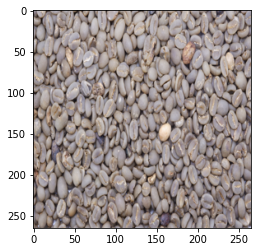

In [ ]:
plt.imshow(image_list[20])

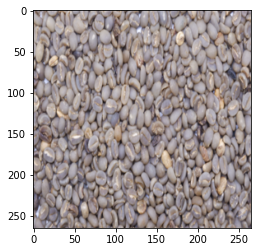

In [ ]:
plt.imshow(image_list[200])

Preprocessing using Cropping

In [ ]:
# def getCropping(cimage):
#   x = 0
#   y = 0
#   h = 180
#   w = 180 
#   croping = cimage[y:y+h, x:x+w]

#   return cropping

In [ ]:
# cropimage_list = arrayImages

In [ ]:
# import cv2
# # x = 0
# # y = 0
# # h = 180
# # w = 180
# cropped_image = []
# for cropimage in arrayImages:
#   cropping = getCropping(cropimage)
#   cropped_image.append(cropping)
# print("jumlah yang di cropping = ", len(cropped_image))

jumlah yang di cropping =  900


In [ ]:
def crop_center(image, x, y, w, h):
  cropping = image[y:y+h, x: x+w]
  return cropping

In [ ]:
listImgCrop = []
for cropimage in arrayImages:
  crop = crop_center(cropimage, 30, 30, 265, 265)
  listImgCrop.append(crop)
print("jumlah yang di crop = ", len(listImgCrop))

jumlah yang di crop =  900


In [ ]:
np.array(listImgCrop[2]).shape

(235, 235, 3)

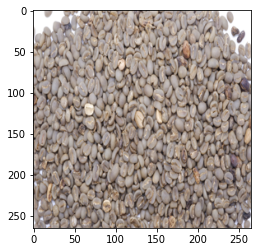

In [ ]:
plt.imshow(arrayImages[2])

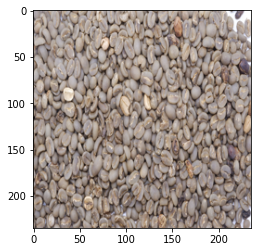

In [ ]:
plt.imshow(listImgCrop[2])

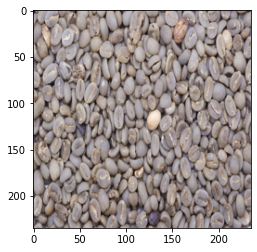

In [ ]:
plt.imshow(listImgCrop[20])

# Color Histogram

<function matplotlib.pyplot.show>

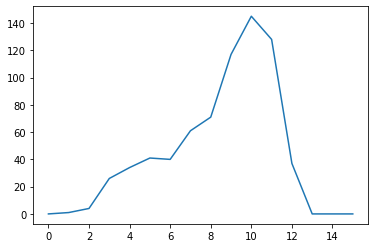

In [ ]:
# coba histogram
histr = cv2.calcHist(listImgCrop[20], [0], None, [16], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

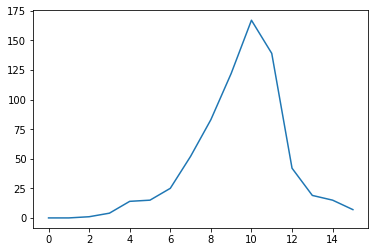

In [ ]:
# coba histogram
histr = cv2.calcHist(listImgCrop[200], [1], None, [16], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

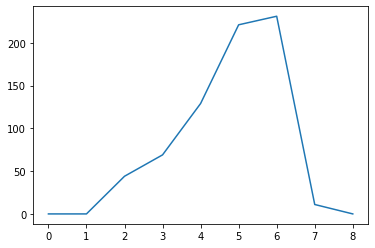

In [ ]:
# coba histogram
histr = cv2.calcHist(listImgCrop[400], [2], None, [9], [0,256])
plt.plot(histr)
plt.show

In [ ]:
histr.shape

(9, 1)

In [ ]:
hist, bin_edges = np.histogram(histr, density=True)

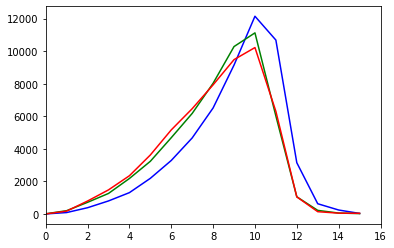

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([listImgCrop[5]],[i],None,[16],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,16])
plt.show()

In [ ]:
def getColorHistogram(rgb_image, channel):
  colHist = cv2.calcHist(rgb_image, [channel], None, [16], [0,256])
  (hist, _) = np.histogram(colHist, bins=16)
  return hist, colHist

In [ ]:
def getColorAverage(rgb_image):
  getAverage_row = np.average(rgb_image, axis=0)
  getAverage = np.average(getAverage_row, axis=0)
  return getAverage

In [ ]:
def getRedAverage(red_image):
  redAverage_row = np.average(red_image, axis=0)
  redAverage = np.average(redAverage_row, axis=0)
  return redAverage

In [ ]:
def getMedian(rgb_image):
  median_imagerow = np.median(rgb_image, axis=0)
  median_image = np.median(median_imagerow, axis=0)
  return median_image

In [ ]:
from scipy import stats

def getMode(chist):
  mode_image = stats.mode(chist, axis=0)
  return mode_image

In [ ]:
listColHist = [] #list Color Histogram
listImgHist = [] #list image Color Histogram
redchannel = []
bluechannel = []
greenchannel = []
listAverage = []
redAvgs = []
medians = []
modes = []
for image in listImgCrop:
  chist_red, img = getColorHistogram(image, 0)
  chist_green, img = getColorHistogram(image, 1)
  chist_blue, img = getColorHistogram(image, 2)

  average_img = getColorAverage(image)
  #red_avg = getRedAverage((chist_red, 0))

  totalHist = np.concatenate((chist_red, chist_green))
  totalHist = np.concatenate((totalHist, chist_blue))

  #avg_color_per_row = np.average(totalHist, axis=0)
  #avg_color = np.average(avg_color_per_row)

  median = getMedian(image)
  #mode = getMode(totalHist)

  listColHist.append((totalHist))
  listImgHist.append(img)
  redchannel.append(chist_red)
  bluechannel.append(chist_blue)
  greenchannel.append(chist_green)
  listAverage.append(average_img)
  #redAvgs.append(red_avg)
  medians.append(median)
  #modes.append(mode)
  
  
print("Jumlah Citra: ", len(listColHist))

Jumlah Citra:  900


In [ ]:
len(listAverage)
np.array(listAverage).shape

(900, 3)

In [ ]:
averagemode = stats.mode(listAverage[20])
np.array(averagemode).shape

(2, 1)

In [ ]:
modeavg = []
for ma in listAverage:
  modeaverage = stats.mode(ma)
  modeavg.append(ma)

In [ ]:
len(modeavg)

900

In [ ]:
np.array(modeavg).shape

(900, 3)

In [ ]:
listAverage[20]

array([148.60593934, 136.68152105, 133.62424627])

In [ ]:
print(medians)

[array([161., 145., 131.]), array([158., 143., 138.]), array([159., 144., 134.]), array([160., 146., 137.]), array([159., 146., 143.]), array([158., 145., 142.]), array([158., 145., 143.]), array([157., 144., 141.]), array([156., 144., 143.]), array([158., 146., 144.]), array([159., 146., 143.]), array([158., 146., 143.]), array([159., 147., 146.]), array([159., 146., 144.]), array([158., 146., 144.]), array([158., 145., 142.]), array([157., 145., 140.]), array([158., 145., 144.]), array([159., 147., 144.]), array([159., 147., 142.]), array([157., 145., 142.]), array([159., 146., 144.]), array([158., 146., 143.]), array([158., 145., 144.]), array([158., 146., 146.]), array([157., 145., 144.]), array([158., 146., 144.]), array([159., 146., 144.]), array([158., 145., 144.]), array([159., 146., 142.]), array([161., 148., 146.]), array([160., 147., 145.]), array([160., 147., 145.]), array([160., 148., 147.]), array([160., 147., 145.]), array([159., 146., 146.]), array([158., 147., 143.]), 

In [ ]:
np.array(medians).shape

(900, 3)

### Concatenate All Features Extraction Histogram (Rmean, Gmean, Bmean, Medians, Modes)

In [ ]:
FeatureHistogram = np.concatenate((listAverage, medians), axis=1)
FeatureHistogram = np.concatenate((FeatureHistogram, modeavg), axis=1)
print("Citra Feature Histogram: ", len(FeatureHistogram))
np.array(FeatureHistogram).shape

Citra Feature Histogram:  900


(900, 9)

In [ ]:
#FeatureHistogram = np.concatenate((listAverage, modes), axis=1)

In [ ]:
# plt.plot(redAvgs[20])
# plt.show()

In [ ]:
# average_hist = []
# for avgI in listColHist:
#   colorPerHist = listColHist(avgI)
#   abg_color_per_row = np.average(colorPerHist, axis=0)
#   avg_color = np.average(avg_color_per_row, axis=0)
#   print(avg_color)
  
#   average_hist.append(avg_color)

# print("Citra yang sudah di kalkulasikan: ", len(average_hist))

In [ ]:
len(listColHist)

900

In [ ]:
avgListHist = np.average(listColHist, axis=0)
print(avgListHist)
len(avgListHist)

[5.78111111 1.61111111 1.16222222 0.94444444 0.8        0.66222222
 0.52777778 0.48111111 0.42555556 0.44222222 0.40333333 0.43777778
 0.39666667 0.35777778 0.32888889 1.23777778 5.84444444 1.55222222
 1.14777778 0.93       0.82555556 0.65666667 0.54555556 0.43555556
 0.43666667 0.42333333 0.39666667 0.45444444 0.41777778 0.37555556
 0.28666667 1.27111111 5.84222222 1.55       1.12555556 0.96
 0.80111111 0.64777778 0.54666667 0.45222222 0.46555556 0.42888889
 0.43111111 0.42555556 0.42111111 0.35555556 0.29666667 1.25      ]


48

[152.5887037  140.73632716 137.15854938]


<function matplotlib.pyplot.show>

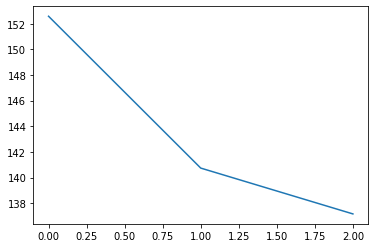

In [ ]:
 avg_color_per_row = np.average(listImgCrop[20], axis=0)
 avg_color = np.average(avg_color_per_row, axis=0)
 print(avg_color)
 plt.plot(avg_color)
 plt.show

##### Try Finding Modus



In [ ]:
from scipy import stats
modusImg = stats.mode(listColHist, axis=0)
len(modusImg)
np.array(modusImg).shape

(2, 1, 48)

##### Try Finding Median

In [ ]:
medhist = np.median(listImgCrop[20], axis=0)
len(medhist)
print(medhist)

[[156. 144. 143.]
 [165. 154. 146.]
 [162. 150. 146.]
 [157. 147. 144.]
 [154. 143. 139.]
 [157. 146. 140.]
 [159. 148. 145.]
 [160. 147. 141.]
 [156. 141. 137.]
 [149. 137. 131.]
 [150. 134. 129.]
 [154. 139. 130.]
 [156. 145. 139.]
 [161. 149. 148.]
 [165. 152. 150.]
 [167. 155. 150.]
 [164. 153. 144.]
 [158. 148. 139.]
 [156. 141. 140.]
 [155. 142. 142.]
 [154. 144. 147.]
 [153. 143. 144.]
 [159. 148. 147.]
 [165. 154. 152.]
 [169. 158. 159.]
 [167. 157. 154.]
 [164. 152. 152.]
 [164. 153. 148.]
 [154. 143. 141.]
 [155. 145. 147.]
 [153. 143. 144.]
 [154. 143. 138.]
 [156. 145. 146.]
 [161. 150. 146.]
 [163. 150. 149.]
 [162. 150. 144.]
 [160. 149. 144.]
 [159. 147. 143.]
 [160. 149. 145.]
 [159. 146. 143.]
 [152. 140. 137.]
 [147. 136. 132.]
 [157. 146. 146.]
 [159. 148. 146.]
 [155. 142. 139.]
 [148. 134. 131.]
 [147. 131. 123.]
 [152. 137. 135.]
 [159. 150. 148.]
 [160. 150. 148.]
 [159. 150. 144.]
 [161. 150. 146.]
 [165. 156. 149.]
 [166. 156. 153.]
 [163. 150. 145.]
 [163. 152

Mean / Average warna per channel semua gambar dalam list

[5.78111111 1.61111111 1.16222222 0.94444444 0.8        0.66222222
 0.52777778 0.48111111 0.42555556 0.44222222 0.40333333 0.43777778
 0.39666667 0.35777778 0.32888889 1.23777778]


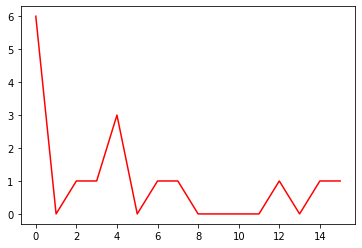

In [ ]:
plt.plot(redchannel[20], "r")
plt.show
avg_red = np.average(redchannel, axis=0)
print(avg_red)

array([5.84222222, 1.55      , 1.12555556, 0.96      , 0.80111111,
       0.64777778, 0.54666667, 0.45222222, 0.46555556, 0.42888889,
       0.43111111, 0.42555556, 0.42111111, 0.35555556, 0.29666667,
       1.25      ])

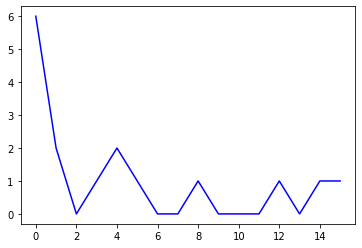

In [ ]:
plt.plot(bluechannel[20], "blue")
plt.show
avg_blue = np.average(bluechannel, axis=0)
avg_blue

array([5.84444444, 1.55222222, 1.14777778, 0.93      , 0.82555556,
       0.65666667, 0.54555556, 0.43555556, 0.43666667, 0.42333333,
       0.39666667, 0.45444444, 0.41777778, 0.37555556, 0.28666667,
       1.27111111])

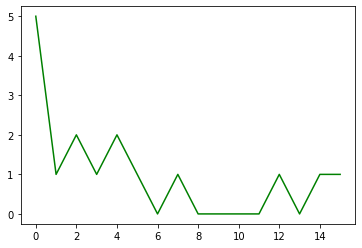

In [ ]:
plt.plot(greenchannel[20], "green")
plt.show
avg_green = np.average(greenchannel, axis=0)
avg_green

In [ ]:
256 * 3

768

In [ ]:
np.array(listColHist).shape

(900, 48)

# LBP Using Library

In [ ]:
from skimage.feature import local_binary_pattern
def getLBPimageScikit(gray_image):
  p = 8
  r = 1
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(grayscalling, p, r, method = 'default')
  n_bins = int(lbp.max() + 1)
  (hist, _) = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density = True)
  return hist, lbp

In [ ]:
listHistLBP = []
listImgLBP = []
for image in listImgCrop:
    hist, img = getLBPimageScikit(image)
    listHistLBP.append((hist))
    listImgLBP.append(img)
print("Jumlah Citra: ", len(listHistLBP))

Jumlah Citra:  900


In [ ]:
np.array(listHistLBP).shape

(900, 256)

In [ ]:
np.array(listImgLBP).shape

(900, 235, 235)

(array([208.,  19.,  12.,   3.,   5.,   2.,   1.,   1.,   3.,   2.]),
 array([0.        , 0.00545224, 0.01090448, 0.01635672, 0.02180896,
        0.0272612 , 0.03271344, 0.03816569, 0.04361793, 0.04907017,
        0.05452241]),
 <a list of 10 Patch objects>)

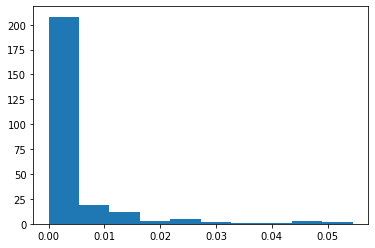

In [ ]:
plt.hist(listHistLBP[20])

(array([214.,  14.,  11.,   3.,   6.,   3.,   1.,   0.,   1.,   3.]),
 array([0.        , 0.00598461, 0.01196922, 0.01795383, 0.02393843,
        0.02992304, 0.03590765, 0.04189226, 0.04787687, 0.05386148,
        0.05984608]),
 <a list of 10 Patch objects>)

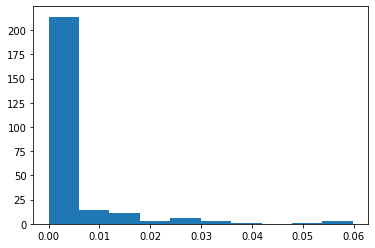

In [ ]:
plt.hist(listHistLBP[189])

In [ ]:
np.array(listColHist).shape

(900, 48)

In [ ]:
np.array(listHistLBP).shape

(900, 256)

In [ ]:
np.array(listAverage).shape

(900, 3)

In [ ]:
#listFeature = np.concatenate((listHistLBP, listColHist), axis=1)
#listFeature = np.concatenate((listHistLBP, listAverage), axis=1)
allFeature = np.concatenate((listHistLBP, FeatureHistogram), axis=1)

In [ ]:
#listFeature.shape

In [ ]:
allFeature.shape

(900, 265)

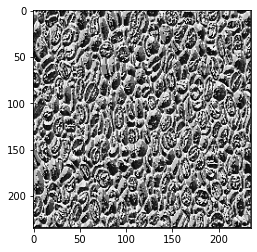

In [ ]:
plt.imshow(listImgLBP[20], cmap="gray")

# Random Forrest Classifier

In [ ]:
# coba satuin list histogram LBP sama Histogram Color
# imagesHist = listColHist, listHistLBP

### LBP Parameter





In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


#### Training LBP Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)


#print("Akurasi", accuracy_score(y_test, y_pred))
#coba data train
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.7893864013266998


#### Testing LBP Random Forrest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)


#print("Akurasi", accuracy_score(y_test, y_pred))
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.8282828282828283


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[50  4  2  0  0]
 [ 7 40 15  0  0]
 [ 2  8 58  4  0]
 [ 0  0  0 50  2]
 [ 0  0  0  7 48]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        56
           1       0.77      0.65      0.70        62
           2       0.77      0.81      0.79        72
           3       0.82      0.96      0.88        52
           4       0.96      0.87      0.91        55

    accuracy                           0.83       297
   macro avg       0.83      0.84      0.83       297
weighted avg       0.83      0.83      0.83       297



### Try Only using Histogram Parameter

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


#### Training Histogram using Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.7230514096185738


### Testing Histogram using Random Forrest

In [ ]:
  from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.696969696969697


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[39 13  4  0  0]
 [11 36 11  4  0]
 [11 24 33  3  1]
 [ 1  1  2 47  1]
 [ 0  0  0  3 52]]
              precision    recall  f1-score   support

           0       0.63      0.70      0.66        56
           1       0.49      0.58      0.53        62
           2       0.66      0.46      0.54        72
           3       0.82      0.90      0.86        52
           4       0.96      0.95      0.95        55

    accuracy                           0.70       297
   macro avg       0.71      0.72      0.71       297
weighted avg       0.70      0.70      0.69       297



#### Training Concatenate Histogram + LBP using Random Forrest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.7893864013266998


#### Testing concatenate Histogram + LBP using Random Forrest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.8619528619528619


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[47  6  3  0  0]
 [ 7 43 11  1  0]
 [ 3  9 57  3  0]
 [ 0  1  1 49  1]
 [ 0  0  1  6 48]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        56
           1       0.73      0.69      0.71        62
           2       0.78      0.79      0.79        72
           3       0.83      0.94      0.88        52
           4       0.98      0.87      0.92        55

    accuracy                           0.82       297
   macro avg       0.83      0.83      0.83       297
weighted avg       0.82      0.82      0.82       297



# KNN Classifier

In [ ]:
from sklearn.model_selection import train_test_split

### Training LBP using KNN

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.8955223880597015


Testing LBP using KNN

In [ ]:
# from sklearn.model_selection import train_test_split
# #X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
# print("Jumlah data train: ", len(X_train))
# print("Jumlah data test: ", len(X_test))

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
y_pred = neigh.predict(X_test)
print("Akurasi KNN = ", accuracy_score(y_test, y_pred))

Akurasi KNN =  0.8215488215488216


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[47  6  3  0  0]
 [ 7 43 11  1  0]
 [ 3  9 57  3  0]
 [ 0  1  1 49  1]
 [ 0  0  1  6 48]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        56
           1       0.73      0.69      0.71        62
           2       0.78      0.79      0.79        72
           3       0.83      0.94      0.88        52
           4       0.98      0.87      0.92        55

    accuracy                           0.82       297
   macro avg       0.83      0.83      0.83       297
weighted avg       0.82      0.82      0.82       297



### Color histogram using KNN

#### Training Color Histogram using KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)


#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.814262023217247


#### Testing Color Histogram using KNN 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_test, y_test)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.7575757575757576


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[47  6  3  0  0]
 [ 7 43 11  1  0]
 [ 3  9 57  3  0]
 [ 0  1  1 49  1]
 [ 0  0  1  6 48]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        56
           1       0.73      0.69      0.71        62
           2       0.78      0.79      0.79        72
           3       0.83      0.94      0.88        52
           4       0.98      0.87      0.92        55

    accuracy                           0.82       297
   macro avg       0.83      0.83      0.83       297
weighted avg       0.82      0.82      0.82       297



#### Training Concate using KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.814262023217247


#### Testing Concate using KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_test, y_test)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.7575757575757576


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[47  6  3  0  0]
 [ 7 43 11  1  0]
 [ 3  9 57  3  0]
 [ 0  1  1 49  1]
 [ 0  0  1  6 48]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        56
           1       0.73      0.69      0.71        62
           2       0.78      0.79      0.79        72
           3       0.83      0.94      0.88        52
           4       0.98      0.87      0.92        55

    accuracy                           0.82       297
   macro avg       0.83      0.83      0.83       297
weighted avg       0.82      0.82      0.82       297



# SVM Classifier

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
# print("Jumlah data train: ", len(X_train))
# print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
# from sklearn import svm
# clf = svm.SVC(gamma="auto")
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

In [ ]:
# from sklearn import metrics
# print("Accuracy SVM: ", metrics.accuracy_score(y_test, y_pred))

Accuracy SVM:  0.1750841750841751


# ANN Classifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
input_shape = (256, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              526336    
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2

In [ ]:
#label[label == 3] = 0

label

# 0 1 2

0      0
1      0
2      0
3      0
4      0
      ..
895    4
896    4
897    4
898    4
899    4
Name: label, Length: 900, dtype: int64

In [ ]:
y = to_categorical(label, num_classes=5)

In [ ]:
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
listHistLBP_new = np.array(listHistLBP)
listHistLBP_new.shape

# 1 2 3 => dibaca 4 kelas karna mulai 0
# 0 1 2

(900, 256)

In [ ]:
FeatureHistogram_new = np.array(FeatureHistogram)
FeatureHistogram_new.shape

(900, 9)

## ANN with LBP feature

---



### Training LBP using ANN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 73ms/step - loss: 1.6101 - accuracy: 0.1852 - val_loss: 1.6150 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 1s 52ms/step - loss: 1.6021 - accuracy: 0.2391 - val_loss: 1.6240 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 1s 50ms/step - loss: 1.6154 - accuracy: 0.2088 - val_loss: 1.6223 - val_accuracy: 0.1791
Epoch 4/1000
10/10 [==============================] - 1s 52ms/step - loss: 1.6042 - accuracy: 0.2256 - val_loss: 1.6191 - val_accuracy: 0.1791
Epoch 5/1000
10/10 [==============================] - 1s 54ms/step - loss: 1.6021 - accuracy: 0.2492 - val_loss: 1.6134 - val_accuracy: 0.1791
Epoch 6/1000
10/10 [==============================] - 1s 51ms/step - loss: 1.5970 - accuracy: 0.2391 - val_loss: 1.6060 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 1s 52ms/step - loss: 1.5916 - accuracy: 0.2626 - val_loss: 1.6023 - val_accuracy: 0.1791

#### Testing LBP using ANN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000


ValueError: ignored

## ANN with Color Histogram

In [ ]:
input_shape = (9, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2048)              20480     
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 41ms/step - loss: 25.8508 - accuracy: 0.2090 - val_loss: 9.0259 - val_accuracy: 0.1886
Epoch 2/1000
19/19 [==============================] - 1s 34ms/step - loss: 10.4025 - accuracy: 0.2255 - val_loss: 2.5500 - val_accuracy: 0.1886
Epoch 3/1000
19/19 [==============================] - 1s 33ms/step - loss: 4.2817 - accuracy: 0.1675 - val_loss: 1.6154 - val_accuracy: 0.1886
Epoch 4/1000
19/19 [==============================] - 1s 34ms/step - loss: 2.4601 - accuracy: 0.1725 - val_loss: 1.6250 - val_accuracy: 0.1886
Epoch 5/1000
19/19 [==============================] - 1s 34ms/step - loss: 2.0559 - accuracy: 0.2123 - val_loss: 1.6159 - val_accuracy: 0.1751
Epoch 6/1000
19/19 [==============================] - 1s 34ms/step - loss: 1.9049 - accuracy: 0.1940 - val_loss: 1.6146 - val_accuracy: 0.2088
Epoch 7/1000
19/19 [==============================] - 1s 34ms/step - loss: 1.8601 - accuracy: 0.1924 - val_loss: 1.6129 - val_accuracy: 0.24

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 0s 49ms/step - loss: 1.6181 - accuracy: 0.1751 - val_loss: 1.6077 - val_accuracy: 0.2123
Epoch 2/1000
10/10 [==============================] - 0s 39ms/step - loss: 1.6175 - accuracy: 0.1751 - val_loss: 1.6077 - val_accuracy: 0.2123
Epoch 3/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6164 - accuracy: 0.1751 - val_loss: 1.6078 - val_accuracy: 0.2123
Epoch 4/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6161 - accuracy: 0.1751 - val_loss: 1.6078 - val_accuracy: 0.2123
Epoch 5/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6152 - accuracy: 0.1751 - val_loss: 1.6079 - val_accuracy: 0.2123
Epoch 6/1000
10/10 [==============================] - 0s 39ms/step - loss: 1.6145 - accuracy: 0.1751 - val_loss: 1.6080 - val_accuracy: 0.2123
Epoch 7/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6142 - accuracy: 0.1751 - val_loss: 1.6081 - val_accuracy: 0.2123

ANN For Concate Methods

In [ ]:
input_shape = (265, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2048)              544768    
_________________________________________________________________
dropout_9 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(allFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 54ms/step - loss: 32.6262 - accuracy: 0.1785 - val_loss: 22.2967 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 44ms/step - loss: 25.5505 - accuracy: 0.1414 - val_loss: 9.5262 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 0s 44ms/step - loss: 12.9111 - accuracy: 0.2189 - val_loss: 2.2582 - val_accuracy: 0.2073
Epoch 4/1000
10/10 [==============================] - 0s 45ms/step - loss: 7.3901 - accuracy: 0.2121 - val_loss: 2.4565 - val_accuracy: 0.2056
Epoch 5/1000
10/10 [==============================] - 0s 43ms/step - loss: 4.7610 - accuracy: 0.2054 - val_loss: 1.7870 - val_accuracy: 0.1957
Epoch 6/1000
10/10 [==============================] - 0s 44ms/step - loss: 3.3897 - accuracy: 0.2020 - val_loss: 1.6562 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 0s 43ms/step - loss: 2.8678 - accuracy: 0.1886 - val_loss: 1.6158 - val_accuracy: 0.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(allFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 57ms/step - loss: 1.6039 - accuracy: 0.2424 - val_loss: 1.6233 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 45ms/step - loss: 1.6031 - accuracy: 0.2424 - val_loss: 1.6234 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 0s 45ms/step - loss: 1.6022 - accuracy: 0.2424 - val_loss: 1.6230 - val_accuracy: 0.1791
Epoch 4/1000
10/10 [==============================] - 0s 46ms/step - loss: 1.6029 - accuracy: 0.2424 - val_loss: 1.6227 - val_accuracy: 0.1791
Epoch 5/1000
10/10 [==============================] - 0s 46ms/step - loss: 1.6029 - accuracy: 0.2424 - val_loss: 1.6226 - val_accuracy: 0.1791
Epoch 6/1000
10/10 [==============================] - 0s 46ms/step - loss: 1.6035 - accuracy: 0.2424 - val_loss: 1.6225 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 0s 45ms/step - loss: 1.6023 - accuracy: 0.2424 - val_loss: 1.6226 - val_accuracy: 0.1791

In [ ]:
input_shape = (259, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 2048)              532480    
_________________________________________________________________
dropout_21 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 5)                

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 58ms/step - loss: 20.2391 - accuracy: 0.2054 - val_loss: 5.0997 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 48ms/step - loss: 10.0816 - accuracy: 0.1919 - val_loss: 4.7441 - val_accuracy: 0.2123
Epoch 3/1000
10/10 [==============================] - 0s 46ms/step - loss: 7.2070 - accuracy: 0.1684 - val_loss: 1.8285 - val_accuracy: 0.2123
Epoch 4/1000
10/10 [==============================] - 0s 45ms/step - loss: 3.9637 - accuracy: 0.1953 - val_loss: 1.7952 - val_accuracy: 0.1957
Epoch 5/1000
10/10 [==============================] - 0s 46ms/step - loss: 2.9890 - accuracy: 0.1684 - val_loss: 1.6533 - val_accuracy: 0.1957
Epoch 6/1000
10/10 [==============================] - 0s 45ms/step - loss: 2.6051 - accuracy: 0.1953 - val_loss: 1.6392 - val_accuracy: 0.1957
Epoch 7/1000
10/10 [==============================] - 0s 45ms/step - loss: 2.2720 - accuracy: 0.2121 - val_loss: 1.6291 - val_accuracy: 0.17

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.6228 - accuracy: 0.1791 - val_loss: 1.6026 - val_accuracy: 0.2424
Epoch 2/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6207 - accuracy: 0.1791 - val_loss: 1.6028 - val_accuracy: 0.2424
Epoch 3/1000
19/19 [==============================] - 1s 36ms/step - loss: 1.6185 - accuracy: 0.1791 - val_loss: 1.6031 - val_accuracy: 0.2424
Epoch 4/1000
19/19 [==============================] - 1s 38ms/step - loss: 1.6174 - accuracy: 0.1791 - val_loss: 1.6035 - val_accuracy: 0.2424
Epoch 5/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6156 - accuracy: 0.1791 - val_loss: 1.6040 - val_accuracy: 0.2424
Epoch 6/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6151 - accuracy: 0.1791 - val_loss: 1.6047 - val_accuracy: 0.2424
Epoch 7/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6140 - accuracy: 0.1758 - val_loss: 1.6054 - val_accuracy: 0.2424